# Basic UD Part-of-speech Analysis

Fairly basic analysis involving POS tags on some Universal Dependencies corpora

In [1]:
import sys
sys.path.append('../')

from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

import src.ud_corpus

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Read the CoNLL-U file

In [2]:
#UD_FILE = "../data/zh_gsd-ud-train.conllu"
UD_FILE = "../data/en_ewt-ud-train.conllu"
#UD_FILE = "../data/ja_gsd-ud-train.conllu"

ud = src.ud_corpus.UDCorpus(data_file_path=UD_FILE)
ud.data[:3]

[TokenList<Al, -, Zaman, :, American, forces, killed, Shaikh, Abdullah, al, -, Ani, ,, the, preacher, at, the, mosque, in, the, town, of, Qaim, ,, near, the, Syrian, border, .>,
 TokenList<[, This, killing, of, a, respected, cleric, will, be, causing, us, trouble, for, years, to, come, ., ]>,
 TokenList<DPA, :, Iraqi, authorities, announced, that, they, had, busted, up, 3, terrorist, cells, operating, in, Baghdad, .>]

## POS counts

In [3]:
pos_counts = defaultdict(int)

for token_list in ud.data:
  for token in token_list:
    pos_tag = token['upostag']
    pos_counts[pos_tag] += 1

<BarContainer object of 17 artists>

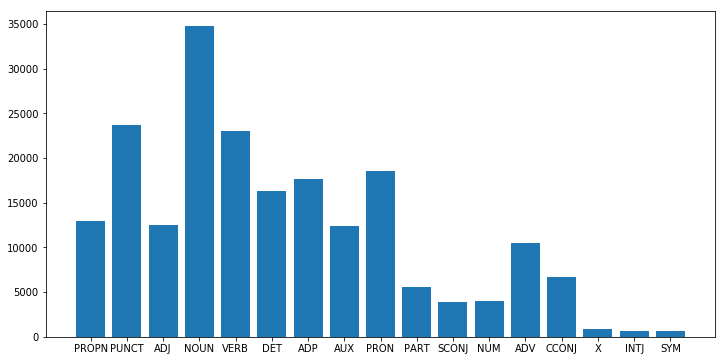

In [4]:
plt.figure(figsize=(12, 6))
plt.bar(pos_counts.keys(), pos_counts.values())

In [5]:
lemma_count_df = ud.get_per_lemma_stats()
lemma_count_df.sort_values('total_count', ascending=False).head(20)

,lemma,noun_count,verb_count,majority_tag,total_count,minority_count,minority_ratio,is_flexible
46,have,0,1339,VERB,1339,0,0.000000,False
31,be,2,750,VERB,752,2,0.002660,False
336,go,3,606,VERB,609,3,0.004926,False
337,get,0,586,VERB,586,0,0.000000,False
110,do,2,533,VERB,535,2,0.003738,False
499,time,462,0,NOUN,462,0,0.000000,False
279,say,0,455,VERB,455,0,0.000000,False
389,know,1,427,VERB,428,1,0.002336,False
103,make,0,402,VERB,402,0,0.000000,False
369,take,6,394,VERB,400,6,0.015000,False


## Distribution of lemmas

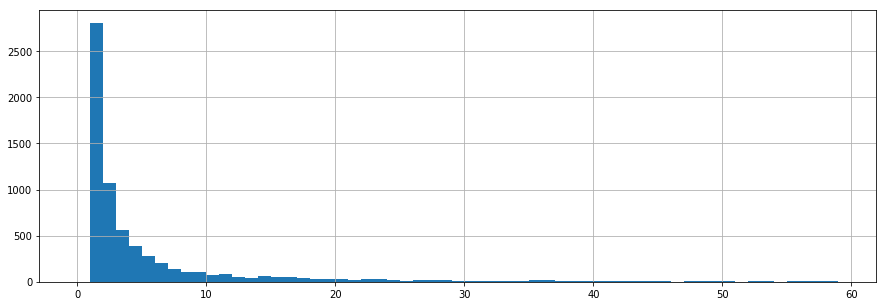

In [6]:
plt.figure(figsize=(15, 5))
lemma_count_df['total_count'].hist(bins=range(0, 60))

## Syntax flexibility metrics

In [7]:
# Only consider lemmas with at least 5 usages
lemma_count_df = lemma_count_df[lemma_count_df['total_count'] >= 5].sort_values('total_count', ascending=False)
noun_lemmas = len(lemma_count_df[lemma_count_df['majority_tag'] == 'NOUN'])
verb_lemmas = len(lemma_count_df[lemma_count_df['majority_tag'] == 'VERB'])
noun_flexibility = len(lemma_count_df[(lemma_count_df['majority_tag'] == 'NOUN') & (lemma_count_df['is_flexible'])]) / noun_lemmas
verb_flexibility = len(lemma_count_df[(lemma_count_df['majority_tag'] == 'VERB') & (lemma_count_df['is_flexible'])]) / verb_lemmas

In [8]:
print('Noun Flexibility = P(flexible | noun):', noun_flexibility)

Noun Flexibility = P(flexible | noun): 0.2119718309859155


In [9]:
print('Verb Flexibility = P(flexible | verb):', verb_flexibility)

Verb Flexibility = P(flexible | verb): 0.34674329501915707


In [10]:
# Compute ratio of flexible words that are nouns, to compare with Balteiro (2007)
num_flexible = len(lemma_count_df[lemma_count_df['is_flexible']])
num_flexible_nouns = len(lemma_count_df[(lemma_count_df['majority_tag'] == 'NOUN') & lemma_count_df['is_flexible']])
print("Flexibility Asymmetry = P(noun | flexible):", num_flexible_nouns / num_flexible)

Flexibility Asymmetry = P(noun | flexible): 0.6244813278008299


/scratch/gobi1/wgao/anaconda-pkgs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


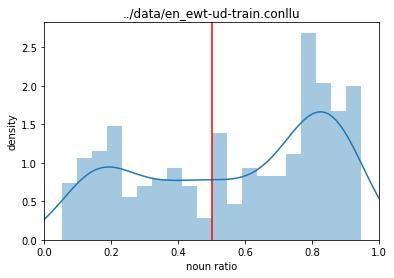

In [11]:
flexible_df = lemma_count_df[lemma_count_df.is_flexible]
dplot = sns.distplot(flexible_df.noun_count / flexible_df.total_count, bins=20)
dplot.set(xlabel='noun ratio', ylabel="density", title=UD_FILE)
dplot.set_xlim((0, 1))
dplot.axvline(x=0.5, color='r')
plt.show()

## Show Examples

In [12]:
# Top flexible nouns
lemma_count_df[(lemma_count_df['majority_tag'] == 'NOUN') & (lemma_count_df['is_flexible'])].head(10)

,lemma,noun_count,verb_count,majority_tag,total_count,minority_count,minority_ratio,is_flexible
492,place,237,20,NOUN,257,20,0.077821,True
783,change,86,75,NOUN,161,75,0.465839,True
1176,name,105,26,NOUN,131,26,0.198473,True
1394,point,106,11,NOUN,117,11,0.094017,True
3355,order,73,43,NOUN,116,43,0.370690,True
1146,experience,99,11,NOUN,110,11,0.100000,True
356,report,74,34,NOUN,108,34,0.314815,True
1020,issue,90,16,NOUN,106,16,0.150943,True
1401,deal,66,35,NOUN,101,35,0.346535,True
1387,end,73,27,NOUN,100,27,0.270000,True


In [13]:
# Examples of inflexible nouns
lemma_count_df[(lemma_count_df['majority_tag'] == 'NOUN') & (~lemma_count_df['is_flexible'])].head(10)

,lemma,noun_count,verb_count,majority_tag,total_count,minority_count,minority_ratio,is_flexible
499,time,462,0,NOUN,462,0,0.000,False
36,year,328,0,NOUN,328,0,0.000,False
400,day,276,0,NOUN,276,0,0.000,False
331,people,250,0,NOUN,250,0,0.000,False
1881,service,231,0,NOUN,231,0,0.000,False
158,way,201,0,NOUN,201,0,0.000,False
150,number,199,1,NOUN,200,1,0.005,False
2060,thanks,192,0,NOUN,192,0,0.000,False
505,food,184,0,NOUN,184,0,0.000,False
497,thing,166,0,NOUN,166,0,0.000,False


In [14]:
# Examples of flexible verbs
lemma_count_df[(lemma_count_df['majority_tag'] == 'VERB') & (lemma_count_df['is_flexible'])].head(10)

,lemma,noun_count,verb_count,majority_tag,total_count,minority_count,minority_ratio,is_flexible
128,work,118,223,VERB,341,118,0.346041,True
502,call,90,210,VERB,300,90,0.300000,True
557,use,20,277,VERB,297,20,0.067340,True
1117,need,28,256,VERB,284,28,0.098592,True
1609,look,18,221,VERB,239,18,0.075314,True
876,help,49,150,VERB,199,49,0.246231,True
421,start,16,99,VERB,115,16,0.139130,True
2632,love,22,91,VERB,113,22,0.194690,True
104,show,24,86,VERB,110,24,0.218182,True
2134,plan,47,50,VERB,97,47,0.484536,True


In [15]:
# Examples of inflexible verbs
lemma_count_df[(lemma_count_df['majority_tag'] == 'VERB') & (~lemma_count_df['is_flexible'])].head(10)

,lemma,noun_count,verb_count,majority_tag,total_count,minority_count,minority_ratio,is_flexible
46,have,0,1339,VERB,1339,0,0.000000,False
31,be,2,750,VERB,752,2,0.002660,False
336,go,3,606,VERB,609,3,0.004926,False
337,get,0,586,VERB,586,0,0.000000,False
110,do,2,533,VERB,535,2,0.003738,False
279,say,0,455,VERB,455,0,0.000000,False
389,know,1,427,VERB,428,1,0.002336,False
103,make,0,402,VERB,402,0,0.000000,False
369,take,6,394,VERB,400,6,0.015000,False
1607,want,0,310,VERB,310,0,0.000000,False


## Chi-squared test that nouns and verbs are not equally likely to convert

In [16]:
base_noun_is_base = lemma_count_df[lemma_count_df.majority_tag == 'NOUN'].noun_count.sum()
base_verb_is_base = lemma_count_df[lemma_count_df.majority_tag == 'VERB'].verb_count.sum()
base_noun_not_base = lemma_count_df[lemma_count_df.majority_tag == 'NOUN'].verb_count.sum()
base_verb_not_base = lemma_count_df[lemma_count_df.majority_tag == 'VERB'].noun_count.sum()

In [17]:
print('Instances of base=N, pos=N (no conversion):', base_noun_is_base)
print('Instances of base=N, pos=V (conversion):', base_noun_not_base)
print('Instances of base=V, pos=V (no conversion):', base_verb_is_base)
print('Instances of base=V, pos=N (conversion):', base_verb_not_base)

Instances of base=N, pos=N (no conversion): 26748
Instances of base=N, pos=V (conversion): 1679
Instances of base=V, pos=V (no conversion): 19743
Instances of base=V, pos=N (conversion): 1460


In [18]:
print('Likelihood of noun converting:', base_noun_not_base/base_noun_is_base)
print('Likelihood of verb converting', base_verb_not_base/base_verb_is_base)

Likelihood of noun converting: 0.06277104830267684
Likelihood of verb converting 0.07395026085194753


In [19]:
import scipy.stats
pvalue = scipy.stats.chi2_contingency([[base_noun_is_base, base_noun_not_base], [base_verb_is_base, base_verb_not_base]])[1]
print('p-value from chi-squared test:', pvalue)

p-value from chi-squared test: 1.006144378317029e-05
